In [1]:
import os

file1 = '../data/NDTV/groundwater_data/grace_2003_2008.csv'
file2 = '../data/NDTV/groundwater_data/grace_2009_2017.csv'

print("File 1 size (MB):", os.path.getsize(file1) / (1024*1024))
print("File 2 size (MB):", os.path.getsize(file2) / (1024*1024))


File 1 size (MB): 0.08200550079345703
File 2 size (MB): 0.0937185287475586


In [2]:
import pandas as pd

file1 = '../data/NDTV/groundwater_data/grace_2003_2008.csv'
file2 = '../data/NDTV/groundwater_data/grace_2009_2017.csv'

grace_1 = pd.read_csv(file1)
grace_2 = pd.read_csv(file2)

grace_df = pd.concat([grace_1, grace_2], ignore_index=True)

grace_df.head()



,date,ADM2_NAME,mean,source
0,2003-01-01,Hamirpur,-3.118798,GRACE
1,2003-01-01,Mahoba,-3.211928,GRACE
2,2003-01-01,Banda,-3.081261,GRACE
3,2003-01-01,Chitrakoot,-3.081315,GRACE
4,2003-01-01,Hamirpur,1.582201,GRACE


In [3]:
print(grace_df.columns)


Index(['date', 'ADM2_NAME', 'mean', 'source'], dtype='object')


In [4]:
grace_df['date'] = pd.to_datetime(grace_df['date'])

grace_df['Year'] = grace_df['date'].dt.year

grace_df.head()


,date,ADM2_NAME,mean,source,Year
0,2003-01-01,Hamirpur,-3.118798,GRACE,2003
1,2003-01-01,Mahoba,-3.211928,GRACE,2003
2,2003-01-01,Banda,-3.081261,GRACE,2003
3,2003-01-01,Chitrakoot,-3.081315,GRACE,2003
4,2003-01-01,Hamirpur,1.582201,GRACE,2003


In [5]:
grace_df['ADM2_NAME'].unique()


array(['Hamirpur', 'Mahoba', 'Banda', 'Chitrakoot', 'Aurangabad',
       'Chhatarpur', 'Damoh', 'Datia', 'Panna', 'Sagar', 'Tikamgarh',
       'Jalaun', 'Jhansi', 'Lalitpur', 'Latur', 'Nanded', 'Osmanabad',
       'Hingoli', 'Jalna', 'Parbhani', 'Pudukkottai', 'Ramanathapuram',
       'Thanjavur', 'Cuddalore', 'Nagapattinam'], dtype=object)

In [6]:
tn_districts = [
    'Pudukkottai',
    'Ramanathapuram',
    'Thanjavur',
    'Cuddalore',
    'Nagapattinam'
]

grace_tn = grace_df[grace_df['ADM2_NAME'].isin(tn_districts)]

grace_tn.head()


,date,ADM2_NAME,mean,source,Year
22,2003-01-01,Pudukkottai,-2.978893,GRACE,2003
23,2003-01-01,Ramanathapuram,-1.473400,GRACE,2003
24,2003-01-01,Thanjavur,-3.198846,GRACE,2003
25,2003-01-01,Cuddalore,-4.659780,GRACE,2003
26,2003-01-01,Nagapattinam,-3.450684,GRACE,2003


In [7]:
yearly_gw = grace_tn.groupby('Year')['mean'].mean().reset_index()

yearly_gw.head()


,Year,mean
0,2003,-1.356258
1,2004,-1.958191
2,2005,-0.079382
3,2006,1.177095
4,2007,0.292745


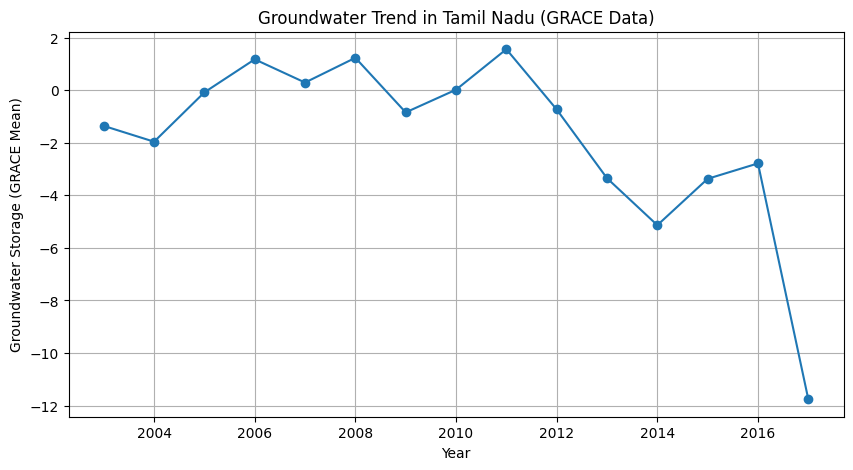

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(yearly_gw['Year'], yearly_gw['mean'], marker='o')
plt.xlabel('Year')
plt.ylabel('Groundwater Storage (GRACE Mean)')
plt.title('Groundwater Trend in Tamil Nadu (GRACE Data)')
plt.grid(True)
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = yearly_gw['Year'].values.reshape(-1,1)
y = yearly_gw['mean'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]

print("Annual Groundwater Change Rate:", slope)


Annual Groundwater Change Rate: -0.47110836393116534


In [10]:
initial = yearly_gw['mean'].iloc[0]
final = yearly_gw['mean'].iloc[-1]

percent_change = ((final - initial) / initial) * 100

print("Percentage change in groundwater over study period:", percent_change, "%")


Percentage change in groundwater over study period: 766.935450762822 %


In [11]:
print("Initial value:", initial)
print("Final value:", final)


Initial value: -1.3562576879506458
Final value: -11.75787870054036


In [12]:
total_change = final - initial
print("Total groundwater change over period:", total_change)


Total groundwater change over period: -10.401621012589715


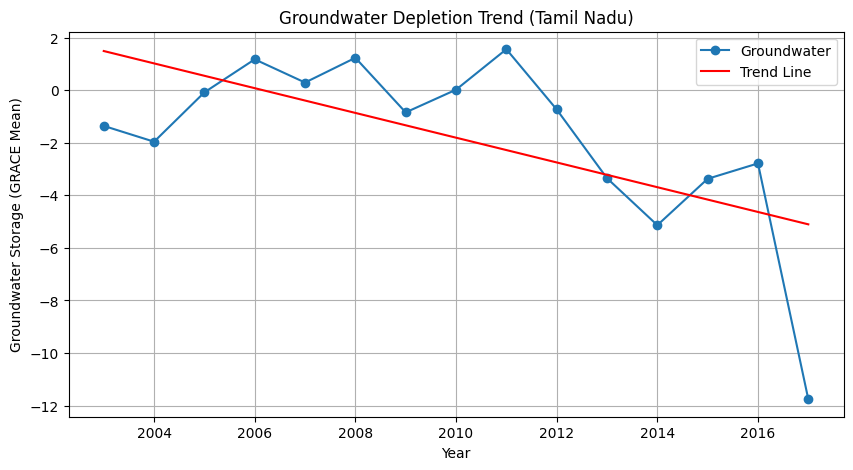

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = yearly_gw['Year'].values.reshape(-1,1)
y = yearly_gw['mean'].values

model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(yearly_gw['Year'], yearly_gw['mean'], marker='o', label='Groundwater')
plt.plot(yearly_gw['Year'], trend_line, color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Groundwater Storage (GRACE Mean)')
plt.title('Groundwater Depletion Trend (Tamil Nadu)')
plt.legend()
plt.grid(True)
plt.show()
